In [1]:
# load our model
#model = #

import sys
#sys.path.append("..")
#sys.path.append("../faceswap_py_b/util/")

#from faceswap_py_b import util
import face_swap

params = {'dataset_a': 'faceA/rgb',
          'dataset_b': 'faceB/rgb',
              'enc_att':True,
              'dec_att':True,
              'disc_att' :False,
              'batch_size': 6,
              'workers': 16,
              'res': 128,
              'res_layers_p': [2,6,9,14,17,20,23,26],
              'res_layers_p_weight': [1, 1, 1,1,1,1,1,1],
              'lr': 2e-4,
              'disc_layers': 3,
              'beta1': .5,
              'beta2': .999,
              'disc_perceptual_weight': 2.5,
              'perceptual_weight': 2.5,
              'edge_weight':.1,
              'eye_weight':0,
              'recon_weight': 3.,
              'train_epoch': 201,
              'ids_test': [0, 100],
              'ids_train': [0, 2],
              'save_every': 5,
              'save_img_every': 1,
              'lr_drop_start': 0,
              'lr_drop_every': 40,
              'save_root': 'test_a'}

rev = face_swap.FaceSwap(params)
#rev.params = params


/home/neuralvfx/test/faceswap-autoencoder_clean/util/helpers.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/neuralvfx/miniconda3/envs/exp_up/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/neuralvfx/miniconda3/envs/exp_up/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/neuralvfx/miniconda3/envs/exp_up/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/neuralvfx/miniconda3/envs/exp_up/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/neuralvfx/miniconda3/envs/exp_up/li

Gathering Statistics
Finished Gathering Statistics
Gathering Statistics
Finished Gathering Statistics
Data Loaders Initialized,  Data A Len:0  Data B Len:0
encoder
down block
128
down block
attn
256
down block
attn
512
down block
1024
down block
1024
decoder
up_block
up_block
attn
up_block
attn
up_block
decoder
up_block
up_block
attn
up_block
attn
up_block
discriminator
128
256
256
256
discriminator
128
256
256
256


/home/neuralvfx/test/faceswap-autoencoder_clean/util/helpers.py:26: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
/home/neuralvfx/test/faceswap-autoencoder_clean/util/helpers.py:24: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
Networks Initialized
Using custom hooks
Using custom hooks
Using custom hooks
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
PreShuffConv
Applying Preshuff ICNR
new icnr init
Losses Initialized


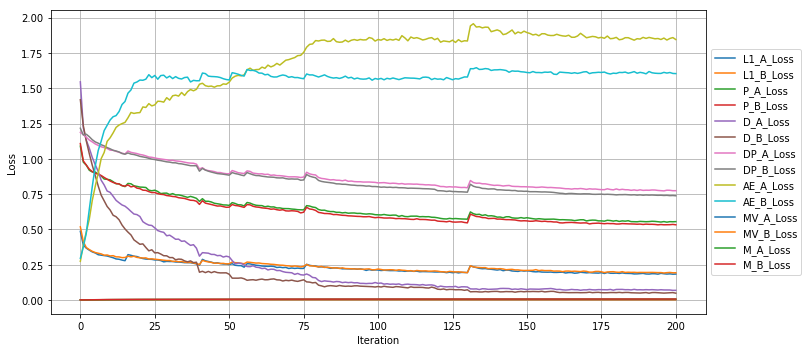

In [2]:
rev.load_state("../faceswap-autoencoder/output/test_a_200.json")

In [3]:
import os
os.getcwd()

'/home/neuralvfx/test/faceswap-autoencoder_clean'

In [4]:
from converter.video_converter import VideoConverter
from detector.face_detector_a import MTCNNFaceDetector


fd = MTCNNFaceDetector()
vc = VideoConverter()
vc.set_face_detector(fd)
vc.set_gan_model(rev)

In [5]:
options = {
    # ===== Fixed =====
    "use_smoothed_bbox": True,
    "use_kalman_filter": True,
    "use_auto_downscaling": False,
    "bbox_moving_avg_coef": 0.65,
    "min_face_area": 35 * 35,
    "IMAGE_SHAPE": (128, 128, 3),
    # ===== Tunable =====
    "kf_noise_coef": 1e-3,
    "use_color_correction": "adain",
    "detec_threshold": 0.8,
    "roi_coverage": 0.9,
    "enhance": 0.,
    "output_type": 3,
    "direction": "AtoB", # ==================== This line determines the transform direction ====================
}

In [14]:
fn_source_video = 'videos/gump.mp4'
fn_target_video = 'videos/tom.mp4'

if options["direction"] == "AtoB":
    input_fn = fn_source_video
    output_fn = "A_to_B_test.mp4"
elif options["direction"] == "BtoA":
    input_fn = fn_target_video
    output_fn = "B_to_A_test.mp4"

duration =  (140,180) #(70,105) #(31,41)(41,65)(106,140) None or a non-negative float tuple: (start_sec, end_sec). Duration of input video to be converted

In [15]:
vc.convert(input_fn=input_fn, output_fn=output_fn, options=options, duration=duration)

[MoviePy] >>>> Building video A_to_B_test.mp4
[MoviePy] Writing audio in A_to_B_testTEMP_MPY_wvf_snd.mp3


100%|██████████| 883/883 [00:00<00:00, 1216.12it/s]

[MoviePy] Done.
[MoviePy] Writing video A_to_B_test.mp4



100%|██████████| 960/960 [09:37<00:00,  1.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: A_to_B_test.mp4 



In [8]:
import numpy as np
start = np.zeros([1,3,32,32])

end = mid = start.transpose(0,2,3,1)

In [ ]:
start.shape, mid.shape, end.shape